We will build a NN network that does multi-class classification based on the dataset in : <a href ="https://github.com/pierinim/tutorials" > https://github.com/pierinim/tutorials </a>

- Developer: Shivam Verma
- Date: 29th June 2025
- Last update: 6th July 2025

# Dataset Exploration

---
In this notebook, we explore the input data file and the different datasets contained in it
- A set of physics-motivated high-level kinematic variables 
- Jets represented as a 2D image in the $\Delta \eta - \Delta \phi$ plane.
- 1D Jet information
These different datasets will be used to train different kind of networks for a classification task aiming 
to distinguish jets originating from `quarks`, `gluons`, `W`, `Z`, or `top quarks`.

---

The input file is in `.h5` format.

In case your environment doesn't have it already installed,
you can install the package `h5py` using the following command:

In [1]:
## To type shell commands, we start the command line with `!`
# ! pip install h5py

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Optional:
import matplotlib
import mplhep as hep 
hep.style.use(hep.style.CMS)
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage[thicklines]{cancel} \usepackage{bm}')


Commands that start with `%` or `%%` are referred to as magic commands in IPython.
- `%` is for a single line of code 
- `%%` is for the entire block of code for eg. %%timeit

Therefore, `%matplotlib` is the line magic command says to IPython, "Hey IPython, I want to configure Matplotlib’s backend right now."
The backend controls how plots will be displayed -- whether they will pop up in a window, display in the notebook, or work interactively.

The phrase `inline` tells IPython, "Use the inline backend so all Matplotlib figures will be drawn inside the notebook, directly below the code cells that create them"


In [3]:
## Example of line magic command
%timeit a = [i/10 for i in np.arange(0,10,1)]

4.62 µs ± 101 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [4]:
%%timeit 
## Example of cell block magic command (if you put this comment before the cell magic command it will give error. why?)
a = []
for i in np.arange(0,10,1):
    a.append(i/10)

4.6 µs ± 544 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Reading the data

---
In order to import the dataset, we now
- clone the dataset repository (to import the data)
- load the h5 files in the `Data/` folder
- extract the data we need: a `target` and `jetImage` corresponding to that target 

In [5]:
# ! git clone https://github.com/shivamv1/ML4HEP_V3_project.git
! ls Data/JetDataset/

jetImage_7_100p_0_10000.h5	jetImage_7_100p_50000_60000.h5
jetImage_7_100p_10000_20000.h5	jetImage_7_100p_60000_70000.h5
jetImage_7_100p_30000_40000.h5	jetImage_7_100p_70000_80000.h5
jetImage_7_100p_40000_50000.h5	jetImage_7_100p_80000_90000.h5


We start loading the main libraries
- h5py to read the input HDF5 file
- numpy top handle the datasets stored there
- matplotlib for graphs
---

In [6]:
# let's open the file
fileIN = 'Data/JetDataset/jetImage_7_100p_40000_50000.h5'
f = h5py.File(fileIN,'r')
# and see what it contains
print(list(f.keys()))

['jetConstituentList', 'jetFeatureNames', 'jetImage', 'jetImageECAL', 'jetImageHCAL', 'jets', 'particleFeatureNames']


Dataset description:
---
---
- 'jetConstituentList' is the list of particles cointained in the jet. For each particle, a list of relevant quantities is stored
- 'particleFeatureNames' is the list of the names corresponding to the quantities contained in 'jetConstituentList'
- 'jetImage' contains the image representation of the jets
- 'jets' is the dataset with physics-motivated features [<span style="color:red">OUR GROUND TRUTH IS HERE</span>]
- 'jetFeatureNames' is the list of the names corresponding to the quantities contained in 'jets'
The first 100 highest-$p_T$ particles are considered for each jet. For each particle, we have many features stored. We will use a basic representation ($p_x$,$p_y$,$p_z$) but you can try to add more if you want
- 'jetImageECAL' and 'jetImageHCAL' are the ECAL- and HCAL-only equivalent images. We will not use them (but you are more than welcome to play with it)


---

The first 100 highest-$p_T$ particles are considered for each jet

---

In [7]:
hcal_images = f.get('jetImageHCAL')
hcal_images.shape


(10000, 100, 100)

In [8]:
labels = f.get('jets')
labels.shape

(10000, 59)

In [9]:
# Last 6 columns are the one-hot encoded labels
labels[:,-6:-1][0]

array([0., 0., 0., 0., 1.])

In [10]:
k = np.argmax(hcal_images,axis = 1)

In [11]:
a = np.array([[9, 2, 7],[6, 3, 7], [3, 1, 5]])
a.shape,a 

((3, 3),
 array([[9, 2, 7],
        [6, 3, 7],
        [3, 1, 5]]))

In [12]:
np.argmax(a,axis = 1) ##this says that reduce the `1` axis which is column here to do that it has to look down each rows and get the index of max value

array([0, 2, 2])

## Jet feature names

We need to look at the `jet` data but before that lets see what the features are there. 
Feature names are given in `jetFeatureNames`.

In [13]:
# These are the quantities we are dealing with
featurenames = f.get('jetFeatureNames')
print(featurenames)
# the b is due to the byte vs utf-8 encoding of the strings in the dataset
# just ignore them for the moment

<HDF5 dataset "jetFeatureNames": shape (59,), type "|O">


In [14]:
featurenames[()]

array([b'j_ptfrac', b'j_pt', b'j_eta', b'j_mass', b'j_tau1_b1',
       b'j_tau2_b1', b'j_tau3_b1', b'j_tau1_b2', b'j_tau2_b2',
       b'j_tau3_b2', b'j_tau32_b1', b'j_tau32_b2', b'j_zlogz', b'j_c1_b0',
       b'j_c1_b1', b'j_c1_b2', b'j_c2_b1', b'j_c2_b2', b'j_d2_b1',
       b'j_d2_b2', b'j_d2_a1_b1', b'j_d2_a1_b2', b'j_m2_b1', b'j_m2_b2',
       b'j_n2_b1', b'j_n2_b2', b'j_tau1_b1_mmdt', b'j_tau2_b1_mmdt',
       b'j_tau3_b1_mmdt', b'j_tau1_b2_mmdt', b'j_tau2_b2_mmdt',
       b'j_tau3_b2_mmdt', b'j_tau32_b1_mmdt', b'j_tau32_b2_mmdt',
       b'j_c1_b0_mmdt', b'j_c1_b1_mmdt', b'j_c1_b2_mmdt', b'j_c2_b1_mmdt',
       b'j_c2_b2_mmdt', b'j_d2_b1_mmdt', b'j_d2_b2_mmdt',
       b'j_d2_a1_b1_mmdt', b'j_d2_a1_b2_mmdt', b'j_m2_b1_mmdt',
       b'j_m2_b2_mmdt', b'j_n2_b1_mmdt', b'j_n2_b2_mmdt', b'j_mass_trim',
       b'j_mass_mmdt', b'j_mass_prun', b'j_mass_sdb2', b'j_mass_sdm1',
       b'j_multiplicity', b'j_g', b'j_q', b'j_w', b'j_z', b'j_t',
       b'j_undef'], dtype=object)

## 1D Jet features
Open the input file and load the `jet` data. It contains:
1. the kinematic variables `[first 53 columns]`

2. The ground truth is incorporated in the ['j_g', 'j_q', 'j_w', 'j_z', 'j_t] vector of boolean in the `[last six columns]`, taking the form
- [1, 0, 0, 0, 0] for gluons
- [0, 1, 0, 0, 0] for quarks
- [0, 0, 1, 0, 0] for Ws
- [0, 0, 0, 1, 0] for Zs
- [0, 0, 0, 0, 1] for tops

This is what is called 'one-hot' encoding of a discrete label (typical of ground truth for classification problems)

We define the 'target' of our problem the set of these labels. 

Our aim will be to build a NN that gives a generalized function for approximating these labels as close as possible.

In [15]:
jet_data = np.array(f.get('jets'))
target = jet_data[:,-6:-1]

In [16]:
# shape of the dataset
print("Feature dataset shape:", jet_data.shape)
print("\nTarget shape:", target.shape)

print("\nFirst five entries of the target:")
for i in range(5):
    print(target[i])
print("\nLast 5 entries:")
for i in range(-5,0):
    print(target[i])

Feature dataset shape: (10000, 59)

Target shape: (10000, 5)

First five entries of the target:
[0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1.]
[0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0.]

Last 5 entries:
[0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 0. 1. 0. 0.]


As you can see there are 10K examples in this file. We will need more for a meaningful training (more later)

---

We have 53 features for each of the jets. More information on these quantities can be found in https://arxiv.org/pdf/1709.08705.pdf

---

We now make some plot

--- 

In [27]:
jet_data.shape , featurenames.shape

((10000, 59), (59,))

In [22]:
labelCat= ["gluon", "quark", "W", "Z", "top"]

matplotlib.rc('text',usetex = False)
# this function makes the histogram of a given quantity for the five classes
def makePlot(feature_index, input_data, input_featurenames):
    
    plt.subplots(figsize = (6,5))
    for i in range(len(labelCat)):

        # notice the use of numpy masking to select specific classes of jets
        my_data = input_data[np.argmax(target, axis=1) == i]

        # then plot the right quantity for the selected data
        plt.hist(my_data[:,feature_index], bins = 20, density=True, histtype='step', lw=1.5, label = labelCat[i])
    plt.semilogy()   
    plt.legend(loc='upper right', bbox_to_anchor=(0.975, 0.975),prop={"size":15},ncol = 1)
    xlabel = str(input_featurenames[feature_index], "utf-8")
    tex_safe_label = xlabel#xlabel.replace('_',r'\_')
    plt.xlabel(tex_safe_label, fontsize=15, loc = 'center')
    plt.ylabel('Prob. Density (a.u.)', fontsize=15,loc = 'center')
    plt.show()

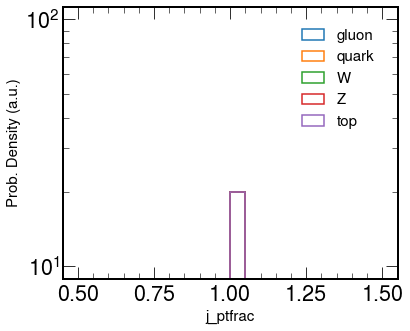

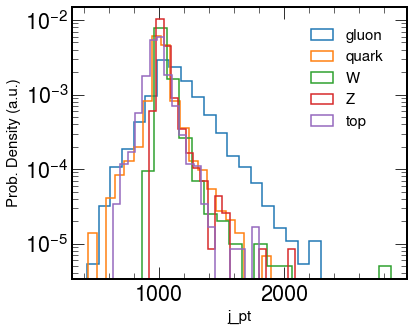

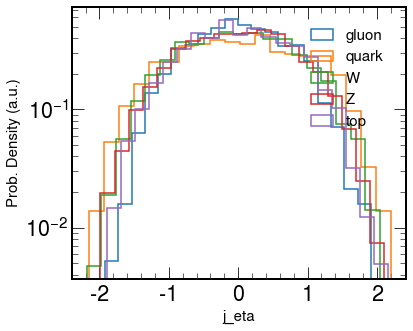

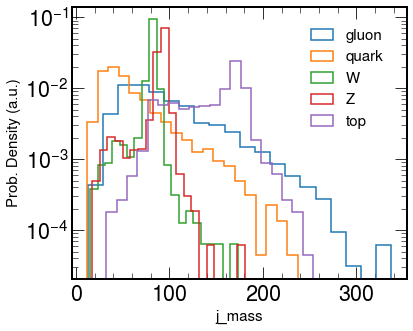

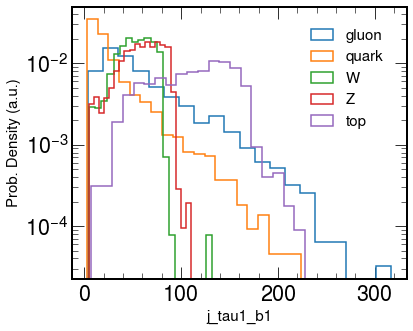

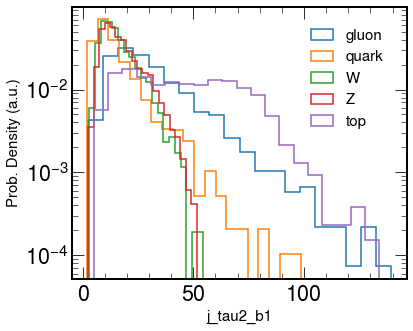

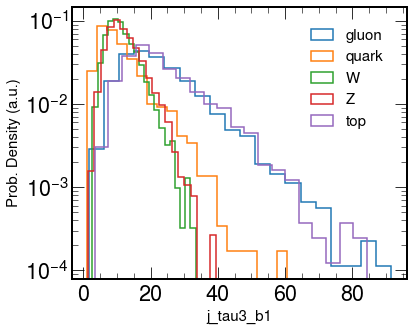

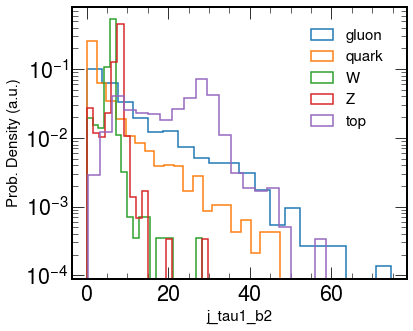

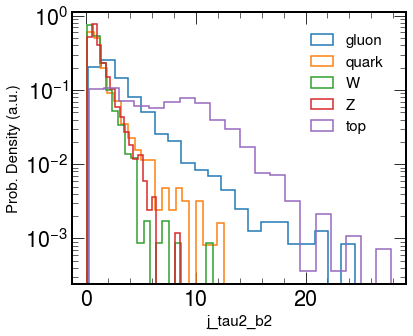

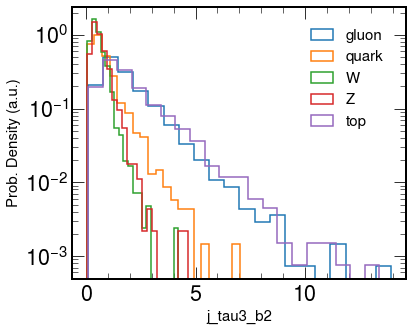

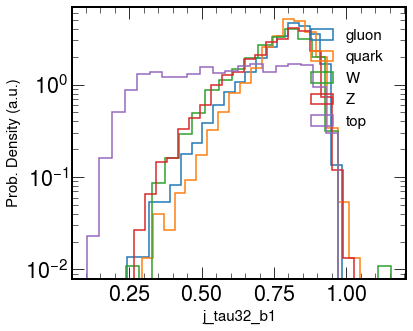

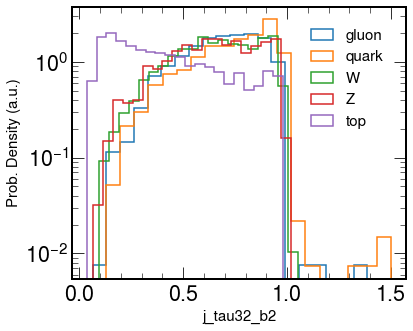

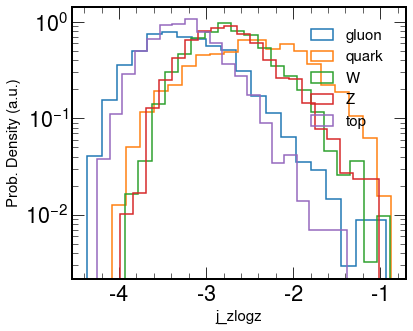

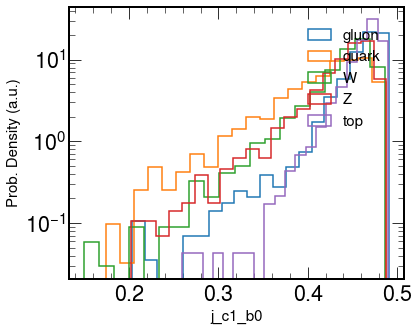

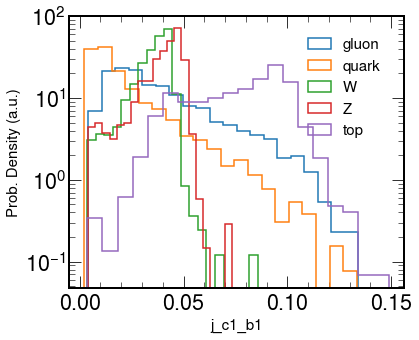

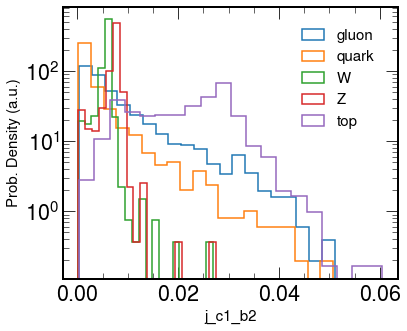

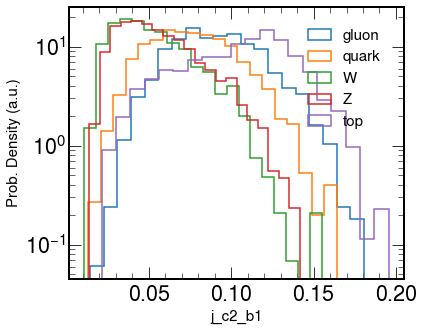

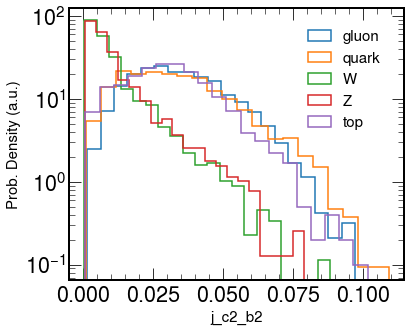

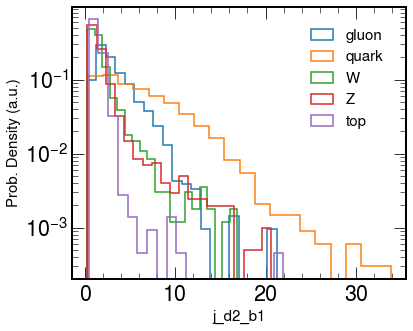

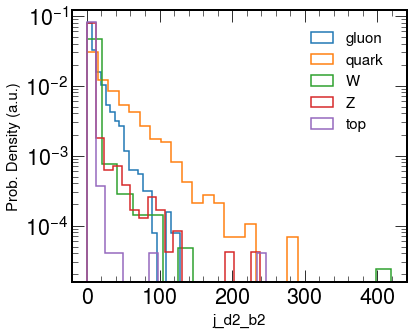

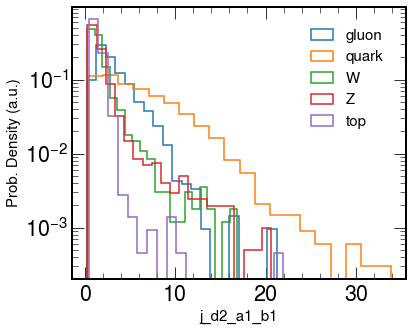

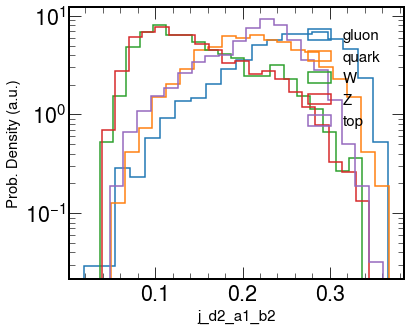

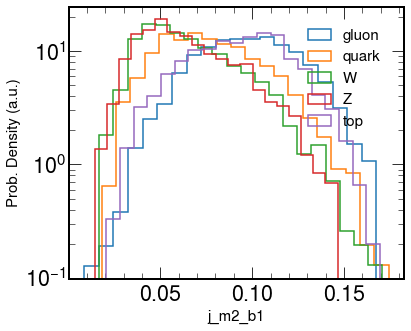

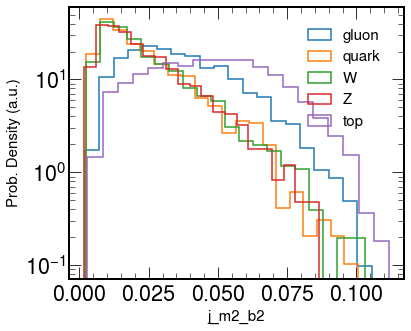

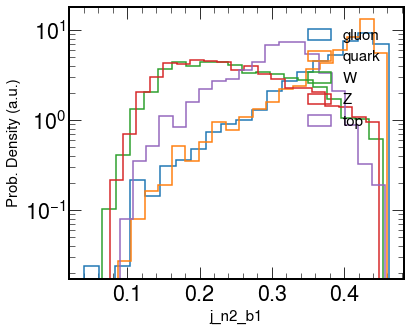

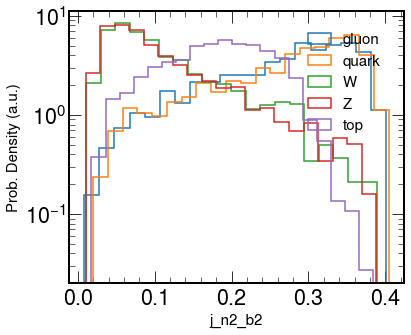

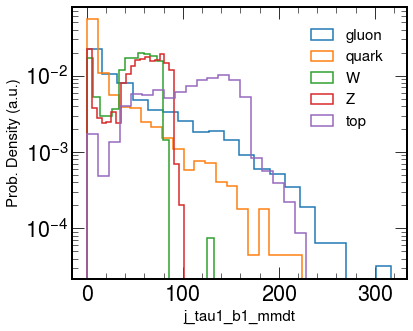

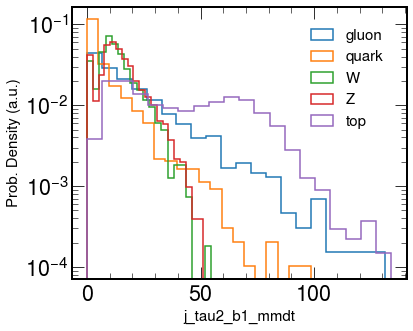

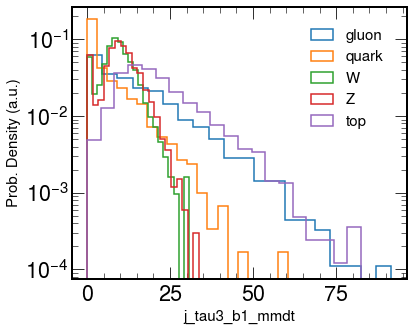

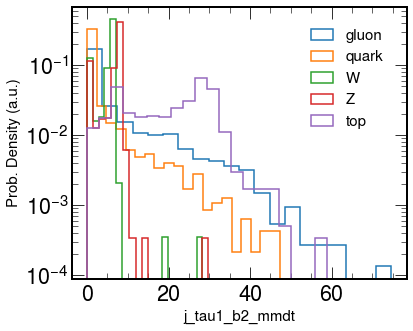

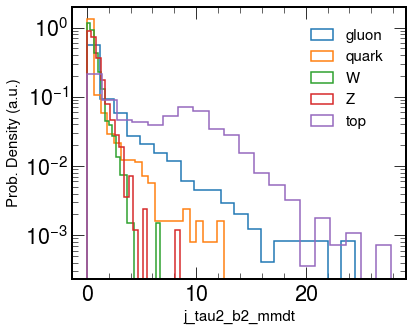

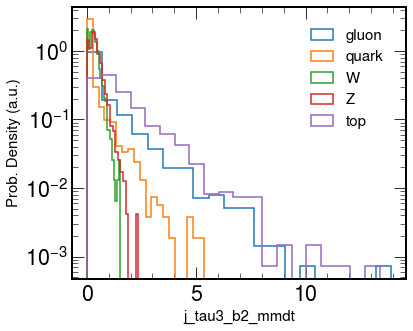

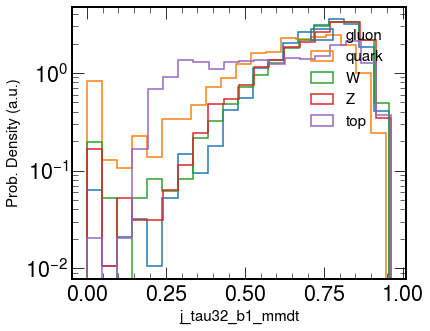

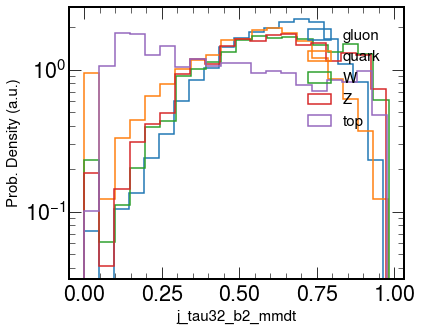

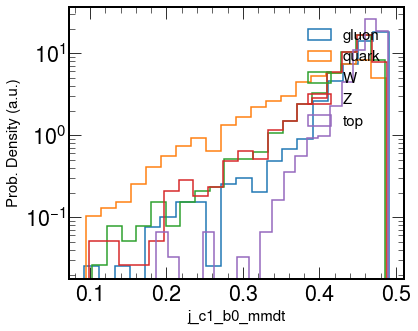

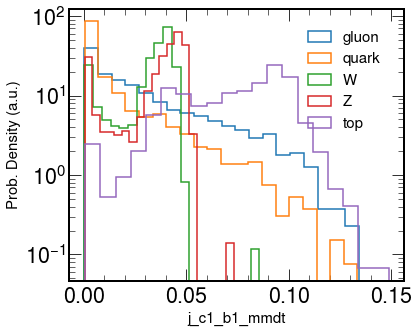

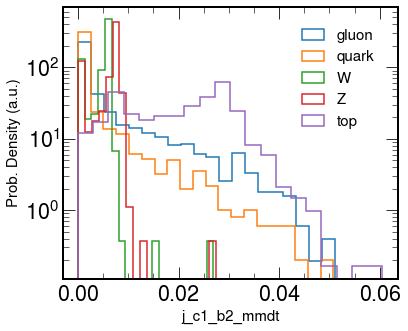

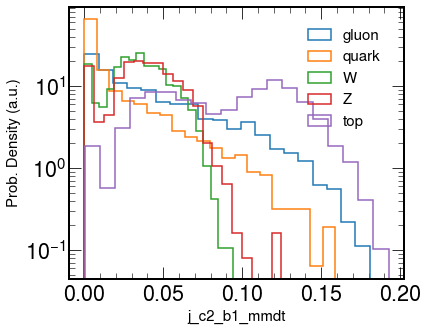

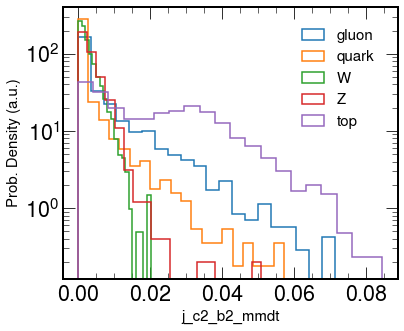

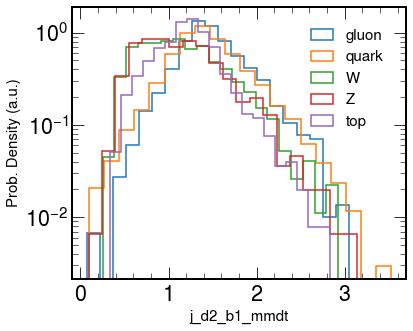

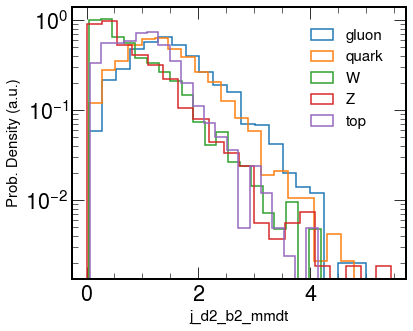

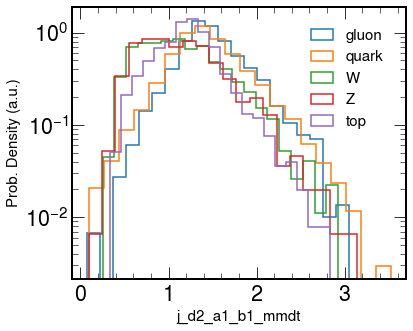

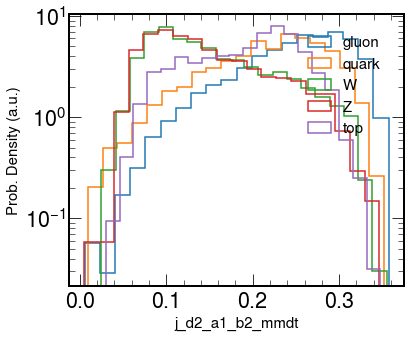

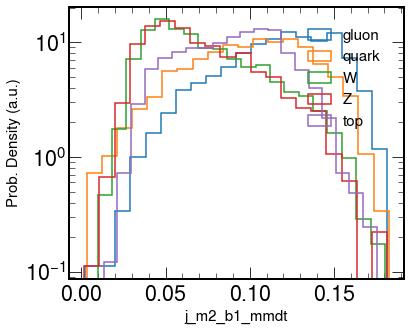

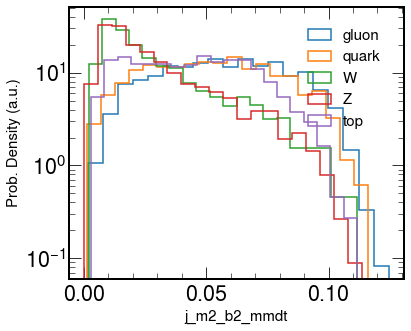

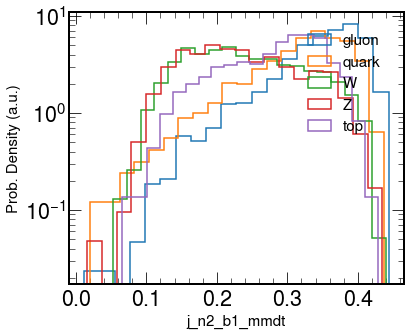

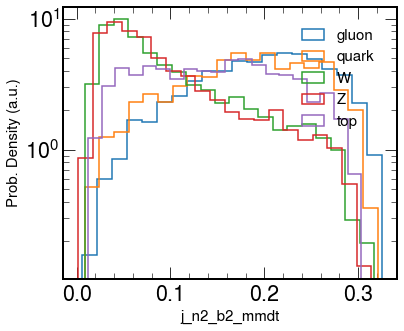

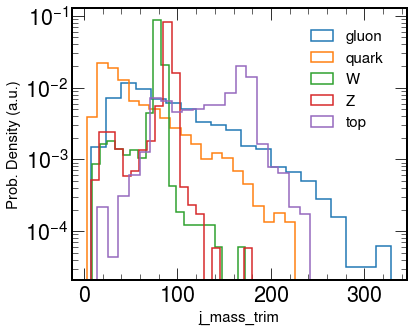

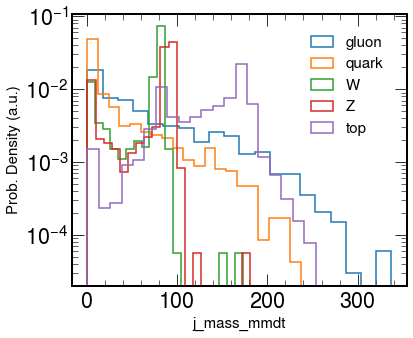

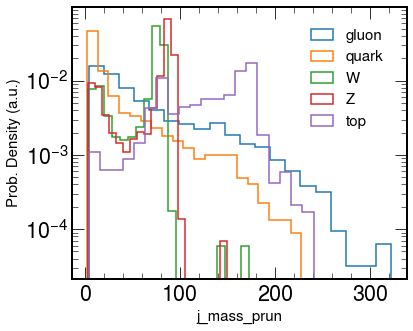

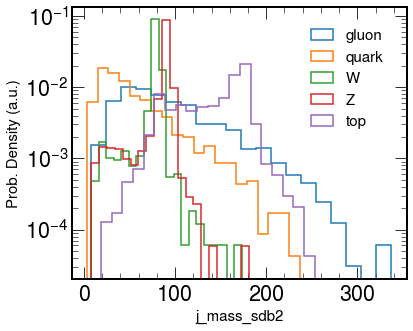

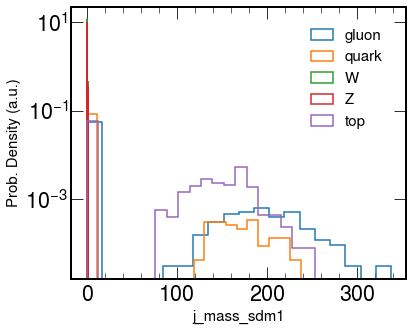

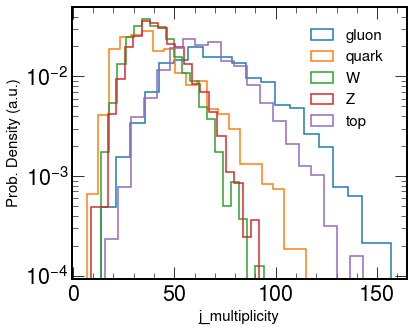

In [23]:
# we now plot all the features
for i in range(len(featurenames[:-6])):
    makePlot(i, jet_data, featurenames)

In [34]:
# jet_type= ["gluon", "quark", "W", "Z", "top"] ## put in the same order as mentioned above

# def plot_jet(jet_data, target, feature_names,feature_index,ax):

#     if(feature_index<53):
#         kwargs = dict(bins = 20, density = True, histtype = 'step', lw = 2)
#         for idx,type in enumerate(jet_type):
#             type_jet_data = jet_data[np.argmax(target, axis = 1) == idx]
            
#             ax.hist(type_jet_data[:,feature_index], label = type,**kwargs)
#         # print(feature_index,str(featurenames[feature_index], "utf-8"))
#         ax.semilogy()
#         ax.set_xlabel(str(feature_names[feature_index], "utf-8"), fontsize=15)
#         ax.set_ylabel('Prob. Density (a.u.)', fontsize=15)
#         ax.legend(loc='upper right', bbox_to_anchor=(0.64, 0.975),prop={"size":10},ncol = 1)  

In [35]:
# num_of_features = featurenames[()][:-6].shape[0]
# n = 6
# m = int(np.ceil(num_of_features / n))

# # Per subplot dimensions
# width_per_col = 6  # inches
# height_per_row = 5  # inches

# # total fig. dimensions
# fig_width = m * width_per_col
# fig_height = n * height_per_row


In [36]:
# fig,axs = plt.subplots(n,m, figsize=(fig_width, fig_height))
# axn = axs.flatten()

# for i,ax in enumerate(axn):
#     plot_jet(jet_data, target, featurenames[:-6],i,ax)
# plt.tight_layout()
# plt.show()

# The image dataset

Jets can be converted to images considering the (&eta;, &phi;) plane, centered along the axis direction and binned.
In our case, we consider a square of 1.6x1.6 in size (because the jet size is R=0.8) binned in 100x100 equal-size 'cells'

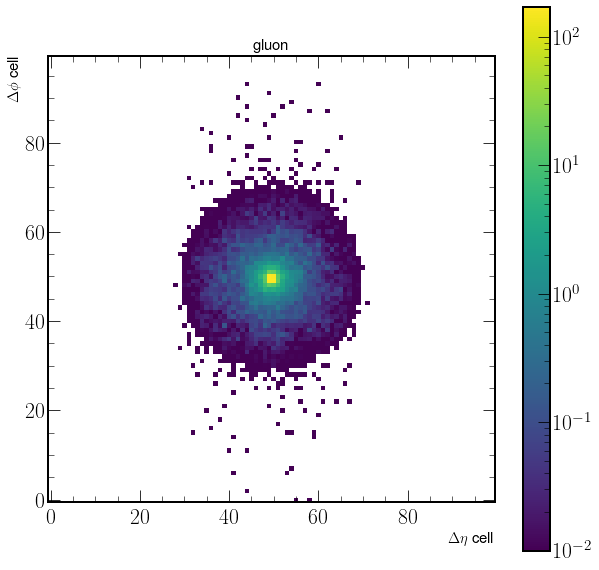

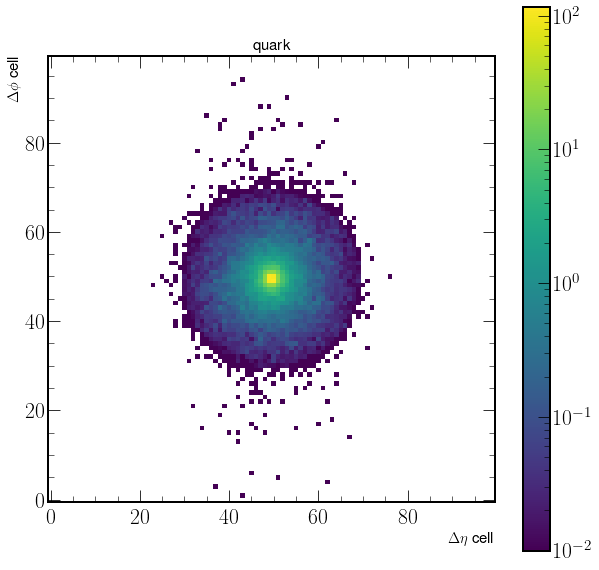

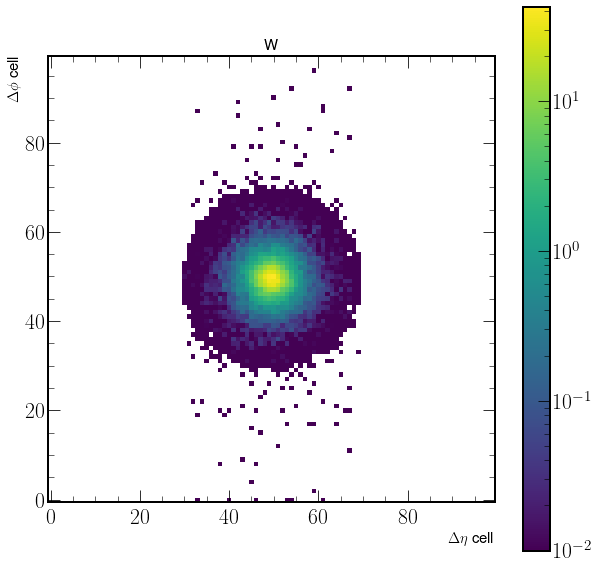

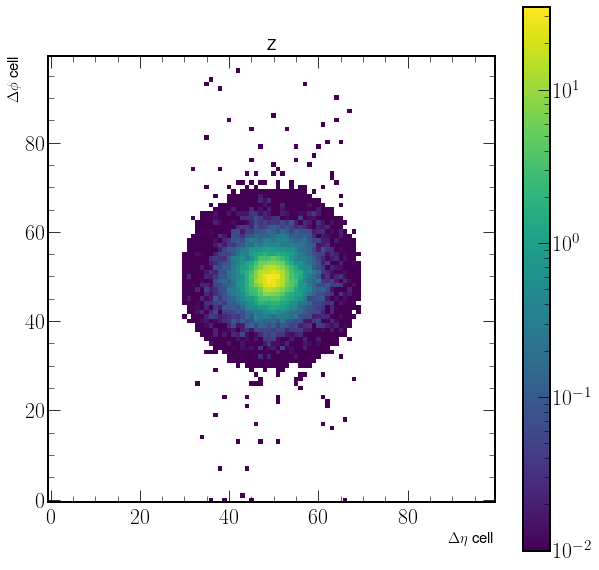

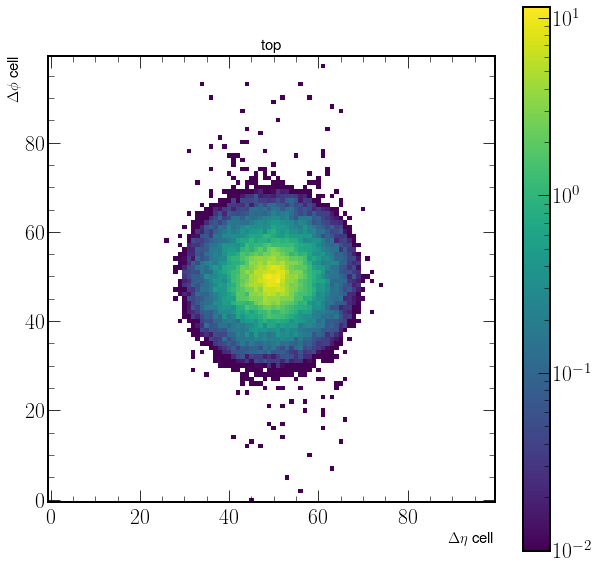

In [26]:
matplotlib.rc('text',usetex = 'True')
from matplotlib.colors import LogNorm
labelCat= ["gluon", "quark", "W", "Z", "top"]
image = np.array(f.get('jetImage'))
image_g = image[np.argmax(target, axis=1) == 0]
image_q = image[np.argmax(target, axis=1) == 1]
image_W = image[np.argmax(target, axis=1) == 2]
image_Z = image[np.argmax(target, axis=1) == 3]
image_t = image[np.argmax(target, axis=1) == 4]
images = [image_q, image_g, image_W, image_Z, image_t]

for i in range(len(images)):
    plt.subplots(figsize = (10,10))
    SUM_Image = np.sum(images[i], axis = 0)
    plt.imshow(SUM_Image/float(images[i].shape[0]), origin='lower',norm=LogNorm(vmin=0.01))
    plt.colorbar()
    plt.title(labelCat[i], fontsize=15)
    plt.xlabel("$\Delta\eta$ cell", fontsize=15)
    plt.ylabel("$\Delta\phi$ cell", fontsize=15)
    plt.show()

In [25]:
image.shape, jet_data.shape

((10000, 100, 100), (10000, 59))

Above images are averaged over the total number of jet images, but this is not what the NN (assuming 2D CNN) takes as an input what goes as an input are individual images.

Let's see what they look like
---

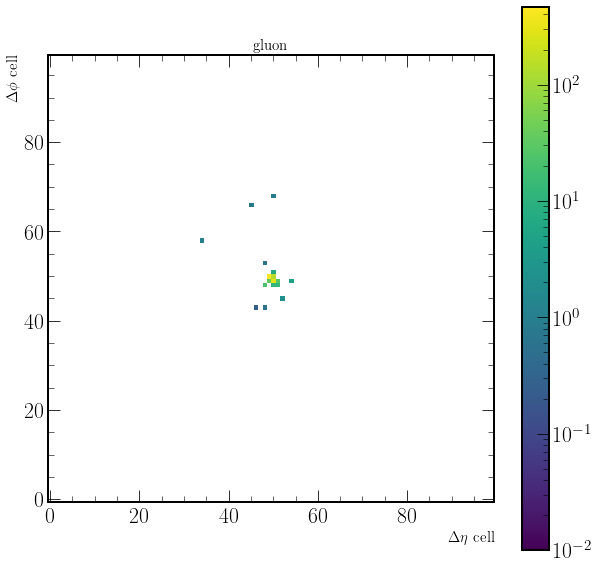

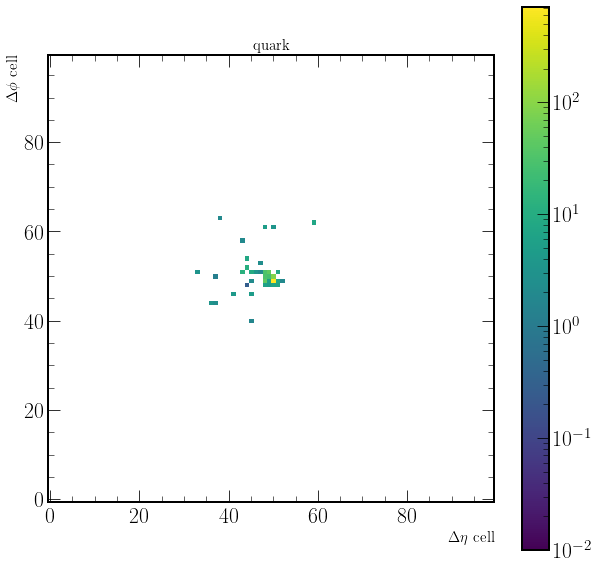

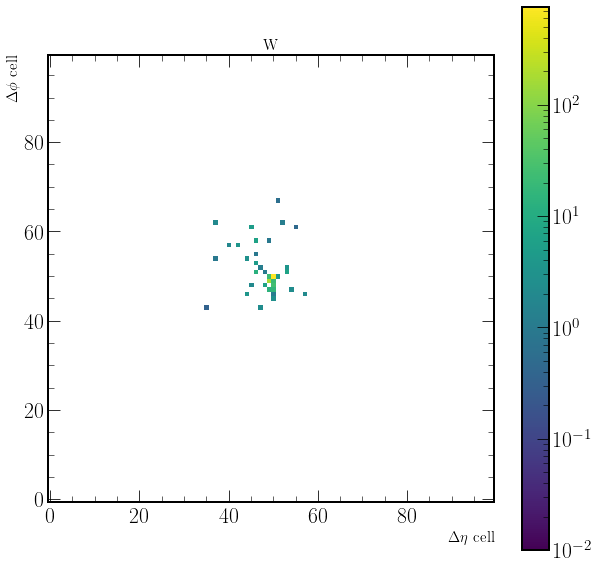

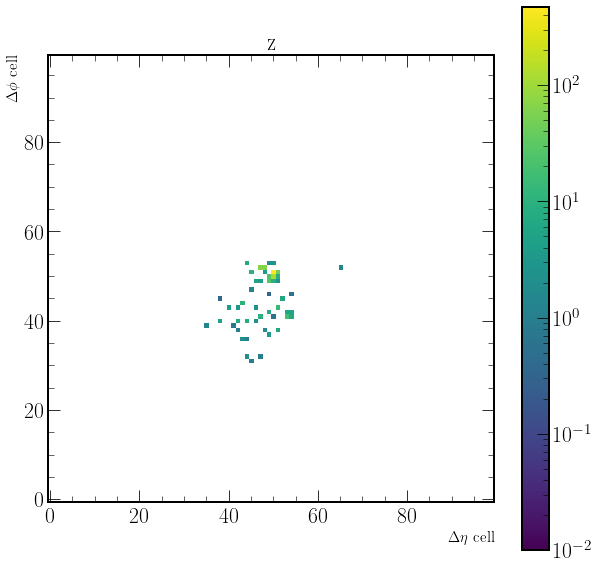

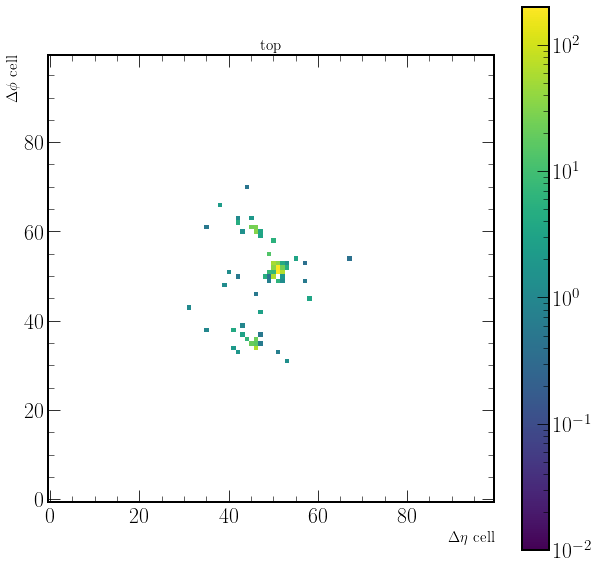

In [72]:
images = [image_q[0], image_g[0], image_W[0], image_Z[0], image_t[0]]
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
for i in range(len(images)):
    plt.imshow(images[i], origin='lower',norm=LogNorm(vmin=0.01))
    plt.colorbar()
    plt.title(labelCat[i], fontsize=15)
    plt.xlabel("$\Delta\eta$ cell", fontsize=15)
    plt.ylabel("$\Delta\phi$ cell", fontsize=15)
    plt.show()


# The particle-list dataset

The dataset consists of a list of jets. For each jet, we have up to 100 particles (zero-padding is used in case a jet has less than 100 particles). For each particle, we have 17 features:

- the four-momentum ($p_x$, $p_y$, $p_z$, $E$)
- the energy divided by the jet energy ($E_{rel}$)
- the transverse momentum ($p_T$), i.e. the momentum projected on the plane transverse to proton beams
- the momentum transverse to the jet direction ($p_T$)
- the pseudorapidity ($\eta$), a function of the polar angle (see https://en.wikipedia.org/wiki/Pseudorapidity)
- the pseudorapidity relative to the jet direction ($\eta_{rel}$)
- the pseudorapidity relative to the jet direction ($\eta_{rot}$) after a rotation is applied so that the jet image looks vertical
- the azimuth angle ($\phi$)
- the azimuth angle relative to the jet direction ($\phi_{rel}$)
- the azimuth angle relative to the jet direction ($\phi_{rot}$) after a rotation is applied so that the jet image looks vertical
- $\Delta R = \sqrt{\Delta\eta^2 + \Delta \phi^2}$
- $\cos(\theta)$
- $\cos(\theta_{rel})$
- ID of the particle (see https://pdg.lbl.gov/2019/reviews/rpp2019-rev-monte-carlo-numbering.pdf)

The last one is not needed, so it was omitted (but it is still present in the list of feature names). Don't get confused about this.

In [37]:
p_featurenames = f.get("particleFeatureNames")
p_featurenames[()], p_featurenames[()].shape

(array([b'j1_px', b'j1_py', b'j1_pz', b'j1_e', b'j1_erel', b'j1_pt',
        b'j1_ptrel', b'j1_eta', b'j1_etarel', b'j1_etarot', b'j1_phi',
        b'j1_phirel', b'j1_phirot', b'j1_deltaR', b'j1_costheta',
        b'j1_costhetarel', b'j1_pdgid'], dtype=object),
 (17,))

In [46]:
p_data = f.get("jetConstituentList")[()]
print(p_data.shape, '(jet i, particle j, feature k)')

(10000, 100, 16) (jet i, particle j, feature k)


In [47]:
import pandas as pd

In [48]:
##Looking at the first jet only 
pd.DataFrame(p_data[0,:,:],columns = p_featurenames[()][:-1])

,b'j1_px',b'j1_py',b'j1_pz',b'j1_e',b'j1_erel',b'j1_pt',b'j1_ptrel',b'j1_eta',b'j1_etarel',b'j1_etarot',b'j1_phi',b'j1_phirel',b'j1_phirot',b'j1_deltaR',b'j1_costheta',b'j1_costhetarel'
0,-4.304043,-122.859375,-182.247086,219.833923,0.118302,122.934746,0.123111,-1.185000,0.043569,-0.000000,-1.605814,0.036087,0.000000,0.056574,-0.829022,6.123234e-17
1,-3.036079,-83.805550,-125.239731,150.723572,0.081111,83.860527,0.083981,-1.191113,0.037457,0.000636,-1.607008,0.034893,-0.006196,0.051191,-0.830924,6.356484e-04
2,-2.461758,-50.923595,-75.287933,90.926147,0.048931,50.983063,0.051056,-1.181782,0.046787,-0.013648,-1.619101,0.022801,-0.000786,0.052047,-0.828013,-1.364757e-02
3,-1.237664,-49.471539,-75.147697,89.978561,0.048421,49.487019,0.049558,-1.205000,0.023569,0.015388,-1.595809,0.046093,-0.016226,0.051769,-0.835173,1.538713e-02
4,-2.045724,-45.406654,-68.198479,81.957199,0.044105,45.452713,0.045518,-1.195000,0.033569,-0.006663,-1.615819,0.026082,-0.012478,0.042511,-0.832123,-6.663369e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
96,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
97,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
98,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00


In [77]:
labelCat= ["gluon", "quark", "W", "Z", "top"]
matplotlib.rc('text',usetex = False)
# this function makes the histogram of a given quantity for the five classes
def makePlot_p(feature_index, input_data, input_featurenames):
    plt.subplots(figsize = (7,5))
    for i in range(len(labelCat)):
        my_data = input_data[:,:,feature_index]
        # notice the use of numpy masking to select specific classes of jets
        my_data = my_data[np.argmax(target, axis=1) == i]
        # then plot the right quantity for the reduced array
        plt.hist(my_data[:,feature_index].flatten(), 20, density=True, histtype='step', fill=False, linewidth=1.5)
    # plt.yscale('log')    
    plt.legend(labelCat, fontsize=12, frameon=False)  
    plt.xlabel(str(input_featurenames[feature_index], "utf-8"), fontsize=15)
    plt.ylabel('Prob. Density (a.u.)', fontsize=15)
    plt.tight_layout()
    plt.show()
    #del fig, ax
    #return fig, ax

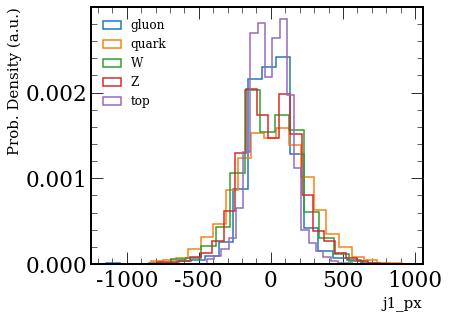

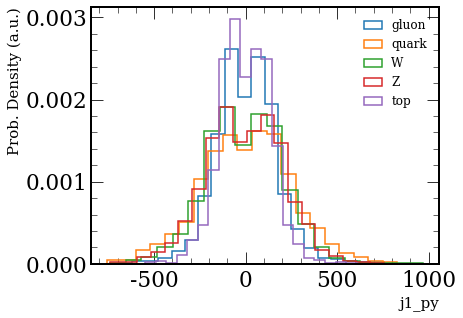

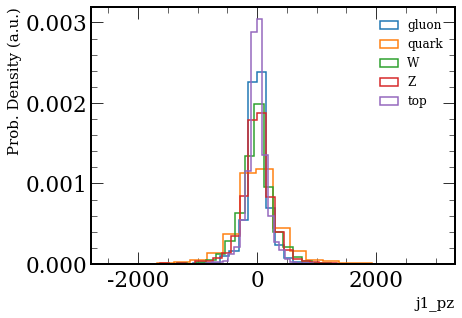

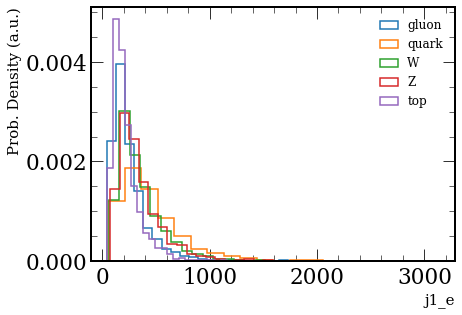

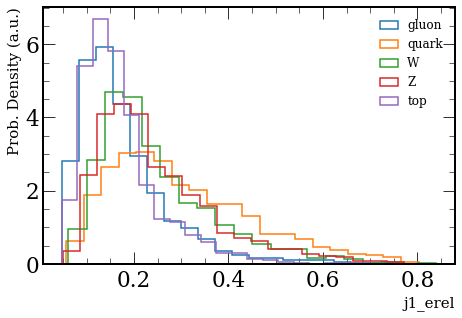

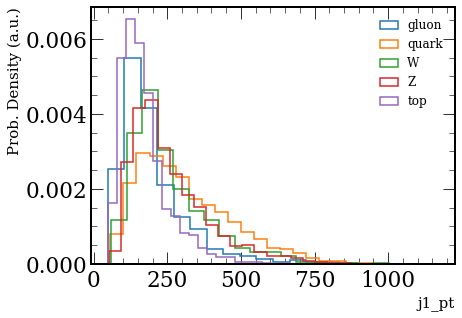

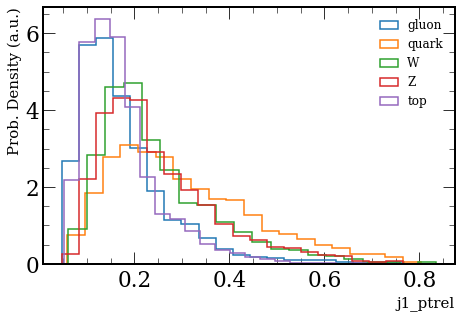

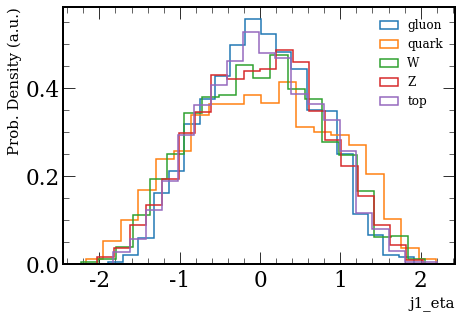

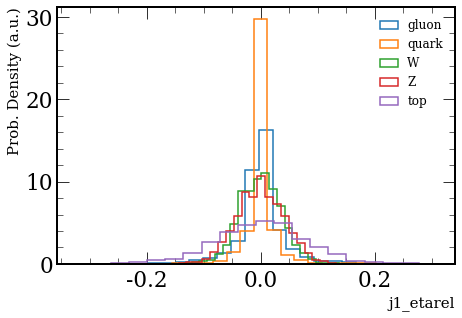

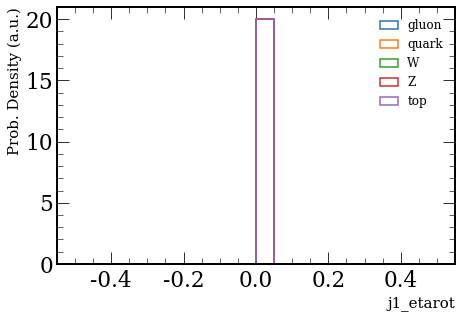

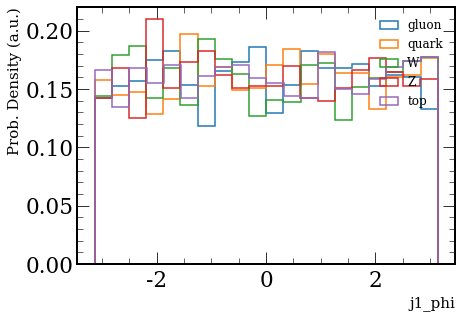

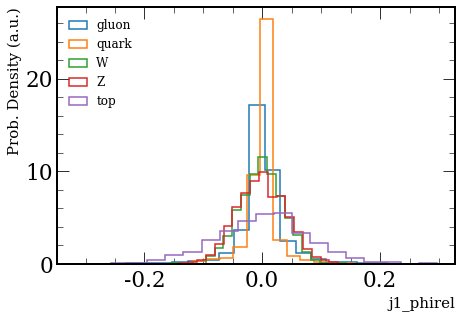

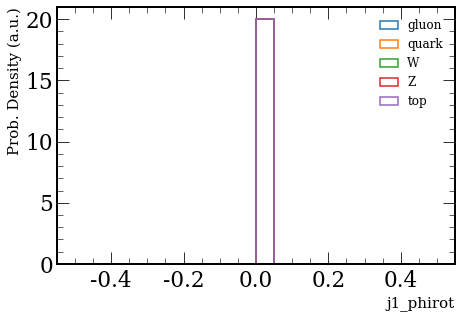

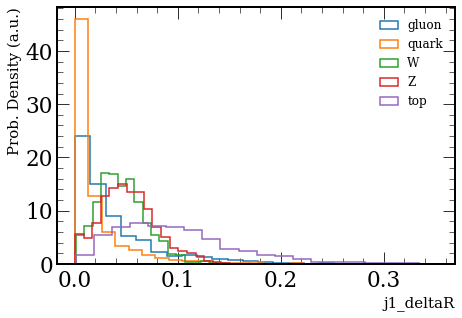

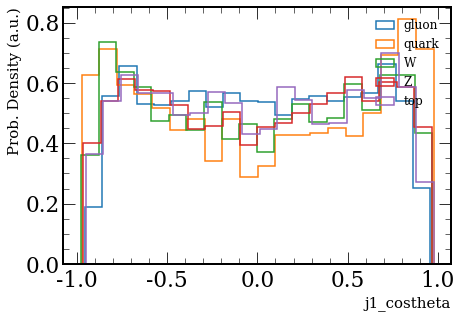

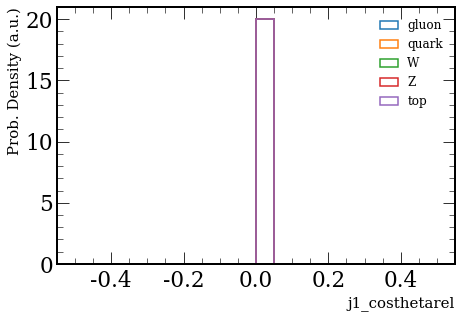

In [76]:
# we now plot all the features
for i in range(len(p_featurenames)-1):
    makePlot_p(i, p_data, p_featurenames)
    #fig.show()